In [2]:
import keras

base_model = keras.applications.EfficientNetB0(include_top=False) 

In [3]:
from keras.utils import image_dataset_from_directory

In [5]:
train_ds, val_ds = image_dataset_from_directory(
    "C:/images", image_size=(224, 224),
    validation_split=0.2, subset='both', seed=42
)

Found 2148 files belonging to 2 classes.
Using 1719 files for training.
Using 429 files for validation.


In [6]:
base_model.trainable=False # 기존 학습된 커널의 가중치를 변경하지 않음 

In [8]:
inputs = keras.layers.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

In [13]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

hist = model.fit(train_ds, epochs=5, validation_data=val_ds, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 932ms/step - accuracy: 0.9864 - loss: 0.0372 - val_accuracy: 0.9837 - val_loss: 0.0484
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 919ms/step - accuracy: 0.9885 - loss: 0.0232 - val_accuracy: 0.9790 - val_loss: 0.0511
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 867ms/step - accuracy: 0.9959 - loss: 0.0175 - val_accuracy: 0.9790 - val_loss: 0.0488
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 893ms/step - accuracy: 0.9949 - loss: 0.0174 - val_accuracy: 0.9837 - val_loss: 0.0471
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 867ms/step - accuracy: 0.9924 - loss: 0.0227 - val_accuracy: 0.9790 - val_loss: 0.0593


  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp312-cp312-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- --

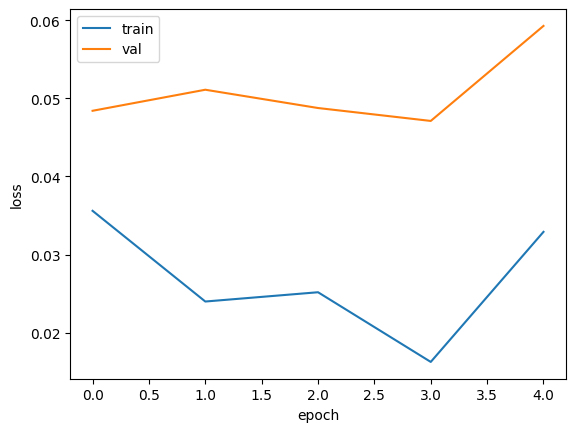

In [15]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
model2 = keras.models.load_model("best-model.keras")

In [17]:
model2.evaluate(val_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 758ms/step - accuracy: 0.9853 - loss: 0.0447


[0.04710319638252258, 0.9836829900741577]

In [19]:
import numpy as np
from PIL import Image

img = Image.open("C:/images/Siirt_Pistachio/siirt 230.jpg")
img = np.array(img.resize((224, 224)))
img.shape

(224, 224, 3)

In [20]:
img = img[np.newaxis,:]
img.shape

(1, 224, 224, 3)

In [21]:
model2.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.9521252]], dtype=float32)